In [31]:
library(ggplot2)
library(readxl)
library(dplyr)
library(tidyr)
library(patchwork)
library(reshape2)
library(ggplot2)
library(dplyr)
library(ggrepel)
library(scales)
library(plotly)
library(htmlwidgets)
library(ggwordcloud)
library(webshot)

In [2]:
flights <- read_excel("number_of_flights_per_year.xlsx")
incidents <- read_excel("number_of_incidents_and_deaths.xlsx")
passengers <- read.csv("flights_csv.csv")

In [3]:
cars <- read_excel("vehicle fatalities.xlsx")
names(cars) <- c('Year','Vehicles')
cars

Year,Vehicles
2000,1.162544
2001,1.179505
2002,1.209187
2003,1.221908
2004,1.234629
2005,1.264311
2006,1.272792
2007,1.277032
2008,1.289753
2009,1.298233


In [4]:
df <- merge(flights,incidents, on ='Year')
df <- merge(df, passengers, on = 'Year')

df <- merge(df, cars, on = 'Year', all.x = TRUE)
names(df) <- c("Year",'Flights','Deaths','Incidents', 'Passengers','Year2','Vehicles')
df <- select(df, -Year2)
df$Passengers <-round(df$Passengers,2)

In [5]:
df <- tail(df,10)
df

,Year,Flights,Deaths,Incidents,Passengers,Vehicles
7,2010,27.8,1130,162,2.11,1.310954
8,2011,30.1,828,154,2.27,1.323675
9,2012,31.2,800,156,2.38,1.323675
10,2013,32.0,459,138,2.52,1.323675
11,2014,33.0,1328,122,2.68,1.332155
12,2015,34.0,898,123,2.90,1.344876
13,2016,35.2,629,102,3.11,1.370318
14,2017,36.4,399,101,3.35,NA
15,2018,38.1,1040,113,3.61,NA
16,2019,38.9,578,125,3.74,NA


In [6]:
f_plot <- ggplot(data = df) + geom_line(aes(x = Year, y = Flights)) +
geom_line(aes(x = Year, y = Flights), color = 'cornflowerblue') + 
geom_text(aes(x = Year, y = Flights, label=Flights), size = 3,color = "#eeeeee", vjust = -1) +
ylim(20,50) +
xlab("")+theme_void() 


p_plot <- ggplot(data = df) + geom_line(aes(x = Year, y = Passengers)) + 
geom_line(aes(x = Year, y = Passengers), color = 'cornflowerblue') + 
geom_text(aes(x = Year, y = Passengers, label=Passengers),size = 3,color = "#eeeeee", vjust = -1) +
ylim(0,5) +
ylab("")+
xlab("")+
theme_void() 

d_plot <- ggplot(data = df) + geom_line(aes(x = Year, y = Deaths)) + 
geom_line(aes(x = Year, y = Deaths), color = 'cornflowerblue') + 
geom_text(aes(x = Year, y = Deaths, label=Deaths),size = 3,color = "#eeeeee", vjust = -1) +
ylim(200,2000) +
xlab("")+
ylab("")+theme_void() 


i_plot <- ggplot(data = df) + 
geom_line(aes(x = Year, y = Incidents), color = 'cornflowerblue') + 
geom_text(aes(x = Year, y = Incidents, label=Incidents),size = 3, color = "#eeeeee", vjust = -1) + 
ylim(90,250) + 
xlab("")+
ylab("")+theme_void() 


Saving 6.67 x 6.67 in image


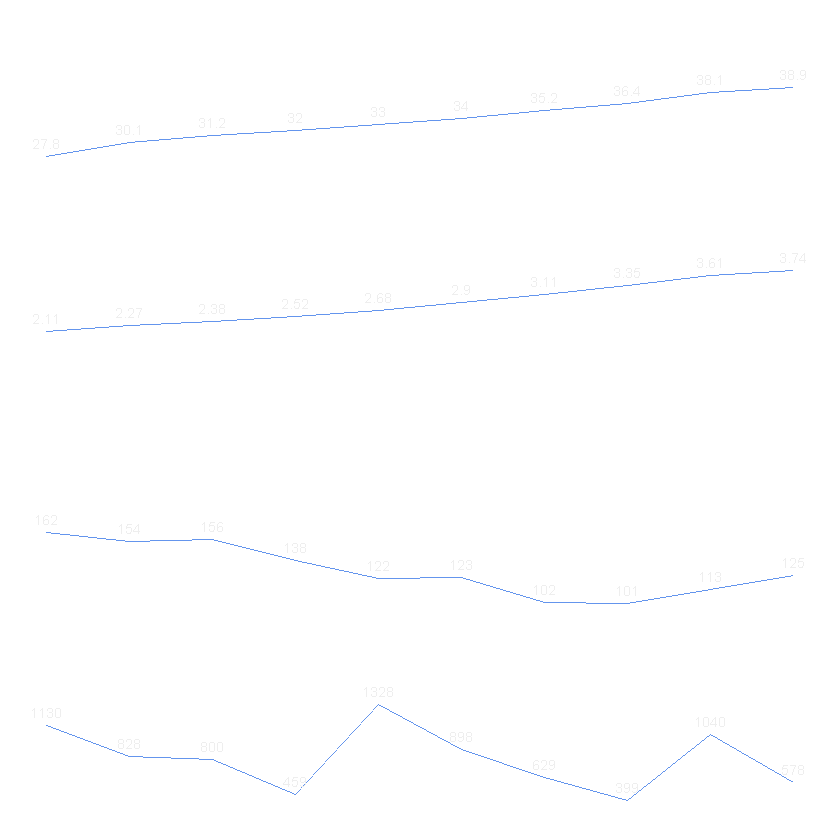

In [7]:
X <- f_plot /p_plot/ i_plot/ d_plot
X + ggsave("infographic1.png")

In [8]:
df

,Year,Flights,Deaths,Incidents,Passengers,Vehicles
7,2010,27.8,1130,162,2.11,1.310954
8,2011,30.1,828,154,2.27,1.323675
9,2012,31.2,800,156,2.38,1.323675
10,2013,32.0,459,138,2.52,1.323675
11,2014,33.0,1328,122,2.68,1.332155
12,2015,34.0,898,123,2.90,1.344876
13,2016,35.2,629,102,3.11,1.370318
14,2017,36.4,399,101,3.35,NA
15,2018,38.1,1040,113,3.61,NA
16,2019,38.9,578,125,3.74,NA


In [9]:
#df$Vehicles[is.na(df$Vehicles)]<-mean(df$Vehicles,na.rm=TRUE)
df

,Year,Flights,Deaths,Incidents,Passengers,Vehicles
7,2010,27.8,1130,162,2.11,1.310954
8,2011,30.1,828,154,2.27,1.323675
9,2012,31.2,800,156,2.38,1.323675
10,2013,32.0,459,138,2.52,1.323675
11,2014,33.0,1328,122,2.68,1.332155
12,2015,34.0,898,123,2.90,1.344876
13,2016,35.2,629,102,3.11,1.370318
14,2017,36.4,399,101,3.35,NA
15,2018,38.1,1040,113,3.61,NA
16,2019,38.9,578,125,3.74,NA


In [10]:
df2 <- df %>% filter(!is.na(Vehicles))

fit <- lm(Vehicles ~ Year, data = df2)

In [11]:
df2

Year,Flights,Deaths,Incidents,Passengers,Vehicles
2010,27.8,1130,162,2.11,1.310954
2011,30.1,828,154,2.27,1.323675
2012,31.2,800,156,2.38,1.323675
2013,32.0,459,138,2.52,1.323675
2014,33.0,1328,122,2.68,1.332155
2015,34.0,898,123,2.90,1.344876
2016,35.2,629,102,3.11,1.370318


In [12]:
df3 <- df %>% 
  mutate(Vehicles = predict(fit, .)) %>%
  # Replace NA with pred in var1
  mutate(var1 = ifelse(is.na(Vehicles), pred, Vehicles))

# See the result
df3 %>% as.data.frame()

,Year,Flights,Deaths,Incidents,Passengers,Vehicles,var1
7,2010,27.8,1130,162,2.11,1.308228,1.308228
8,2011,30.1,828,154,2.27,1.316406,1.316406
9,2012,31.2,800,156,2.38,1.324584,1.324584
10,2013,32.0,459,138,2.52,1.332761,1.332761
11,2014,33.0,1328,122,2.68,1.340939,1.340939
12,2015,34.0,898,123,2.90,1.349117,1.349117
13,2016,35.2,629,102,3.11,1.357294,1.357294
14,2017,36.4,399,101,3.35,1.365472,1.365472
15,2018,38.1,1040,113,3.61,1.373650,1.373650
16,2019,38.9,578,125,3.74,1.381827,1.381827


In [13]:
df

,Year,Flights,Deaths,Incidents,Passengers,Vehicles
7,2010,27.8,1130,162,2.11,1.310954
8,2011,30.1,828,154,2.27,1.323675
9,2012,31.2,800,156,2.38,1.323675
10,2013,32.0,459,138,2.52,1.323675
11,2014,33.0,1328,122,2.68,1.332155
12,2015,34.0,898,123,2.90,1.344876
13,2016,35.2,629,102,3.11,1.370318
14,2017,36.4,399,101,3.35,NA
15,2018,38.1,1040,113,3.61,NA
16,2019,38.9,578,125,3.74,NA


In [14]:
newvar1<-approx(df$Vehicles, df$Year, xout=df$Year)

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

In [15]:
df2 <- df %>% filter(!is.na(Vehicles))

fit <- lm(Vehicles ~ Year, data = df2)

# See the result
summary(fit)


Call:
lm(formula = Vehicles ~ Year, data = df2)

Residuals:
         1          2          3          4          5          6          7 
 0.0027259  0.0072691 -0.0009086 -0.0090863 -0.0087834 -0.0042403  0.0130237 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -15.128925   3.438146  -4.400  0.00702 **
Year          0.008178   0.001708   4.788  0.00494 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009038 on 5 degrees of freedom
Multiple R-squared:  0.8209,	Adjusted R-squared:  0.7851 
F-statistic: 22.92 on 1 and 5 DF,  p-value: 0.004936


In [27]:
df3 <- df %>% 
  mutate(pred = predict(fit, .)) %>%
  # Replace NA with pred in var1
  mutate(var1 = ifelse(is.na(Vehicles), pred, Vehicles))

df3$Vehicles <- df3$var1*1000000
names(df3) <- c('Year','Flights','Airline.Casualties','Incidents','Passengers','Vehicle.Casualties','x','y')
df3

,Year,Flights,Airline.Casualties,Incidents,Passengers,Vehicle.Casualties,x,y
7,2010,27.8,1130,162,2.11,1310954,1.308228,1.310954
8,2011,30.1,828,154,2.27,1323675,1.316406,1.323675
9,2012,31.2,800,156,2.38,1323675,1.324584,1.323675
10,2013,32.0,459,138,2.52,1323675,1.332761,1.323675
11,2014,33.0,1328,122,2.68,1332155,1.340939,1.332155
12,2015,34.0,898,123,2.90,1344876,1.349117,1.344876
13,2016,35.2,629,102,3.11,1370318,1.357294,1.370318
14,2017,36.4,399,101,3.35,1365472,1.365472,1.365472
15,2018,38.1,1040,113,3.61,1373650,1.373650,1.373650
16,2019,38.9,578,125,3.74,1381827,1.381827,1.381827


In [28]:
df3$x <- round(df3$x, 2)
df3

,Year,Flights,Airline.Casualties,Incidents,Passengers,Vehicle.Casualties,x,y
7,2010,27.8,1130,162,2.11,1310954,1.31,1.310954
8,2011,30.1,828,154,2.27,1323675,1.32,1.323675
9,2012,31.2,800,156,2.38,1323675,1.32,1.323675
10,2013,32.0,459,138,2.52,1323675,1.33,1.323675
11,2014,33.0,1328,122,2.68,1332155,1.34,1.332155
12,2015,34.0,898,123,2.90,1344876,1.35,1.344876
13,2016,35.2,629,102,3.11,1370318,1.36,1.370318
14,2017,36.4,399,101,3.35,1365472,1.37,1.365472
15,2018,38.1,1040,113,3.61,1373650,1.37,1.373650
16,2019,38.9,578,125,3.74,1381827,1.38,1.381827


In [29]:
bs = seq(2010, 2019, by=2)

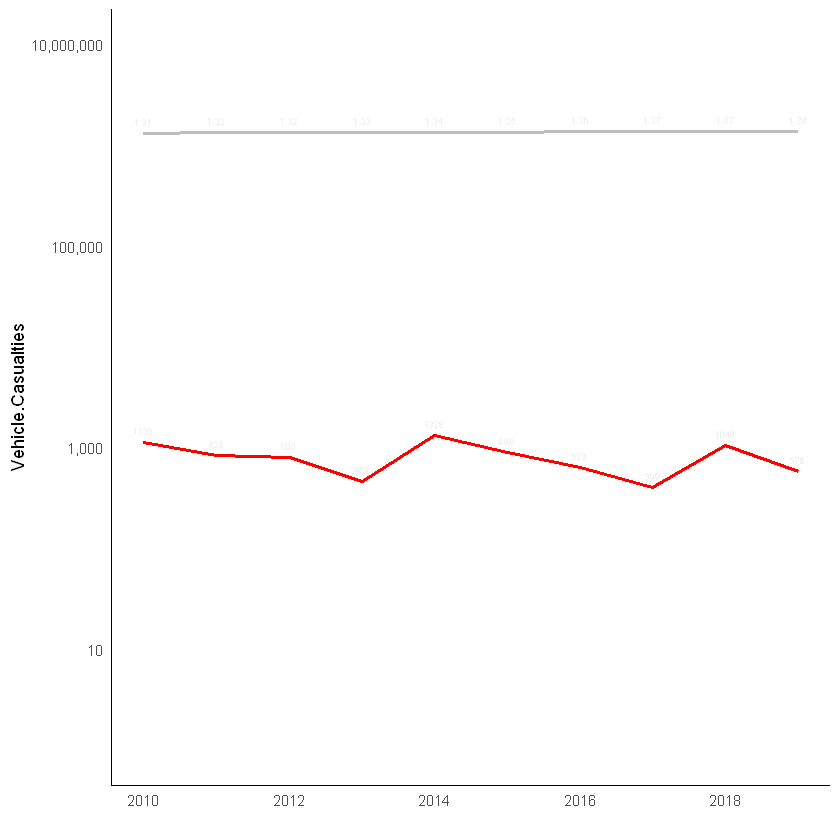

In [30]:
ggplot(data = df3) + 
geom_line(aes(x = Year, y =Vehicle.Casualties), color = 'gray', size = 1) +
geom_line(aes(x = Year, y =Airline.Casualties), color = 'red', size = 1)  + 
geom_text(aes(x = Year, y = Vehicle.Casualties, label=x),size = 2, color = "#eeeeee", vjust = -1, parse=TRUE) + 
geom_text(aes(x = Year, y = Airline.Casualties, label=Airline.Casualties),size = 2, color = "#eeeeee", vjust = -1, parse=TRUE) + 
theme_minimal() +  
scale_y_log10(labels = comma, limits = c(1,10000000)) + 
scale_x_continuous(name="", breaks = bs) +
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
ggsave(width = 4, height = 4, dpi = 300, filename = "squished axis.png") 

In [20]:
df4 <- as.data.frame(colSums(df3, dims = 1))
df4$names <- row.names(df4) 
row.names(df4) <- NULL
df4

"colSums(df3, dims = 1)",names
2.014500e+04,Year
3.367000e+02,Flights
8.089000e+03,Airline.Casualties
1.296000e+03,Incidents
2.867000e+01,Passengers
1.345028e+07,Vehicle.Casualties
1.340000e+01,x
1.345028e+01,y


In [21]:
df4 = subset(df4, names %in% c('Vehicle.Casualties','Airline.Casualties'))
names(df4) <- c('Count','Type')
df4

,Count,Type
3,8089,Airline.Casualties
6,13450278,Vehicle.Casualties


Saving 6.67 x 6.67 in image


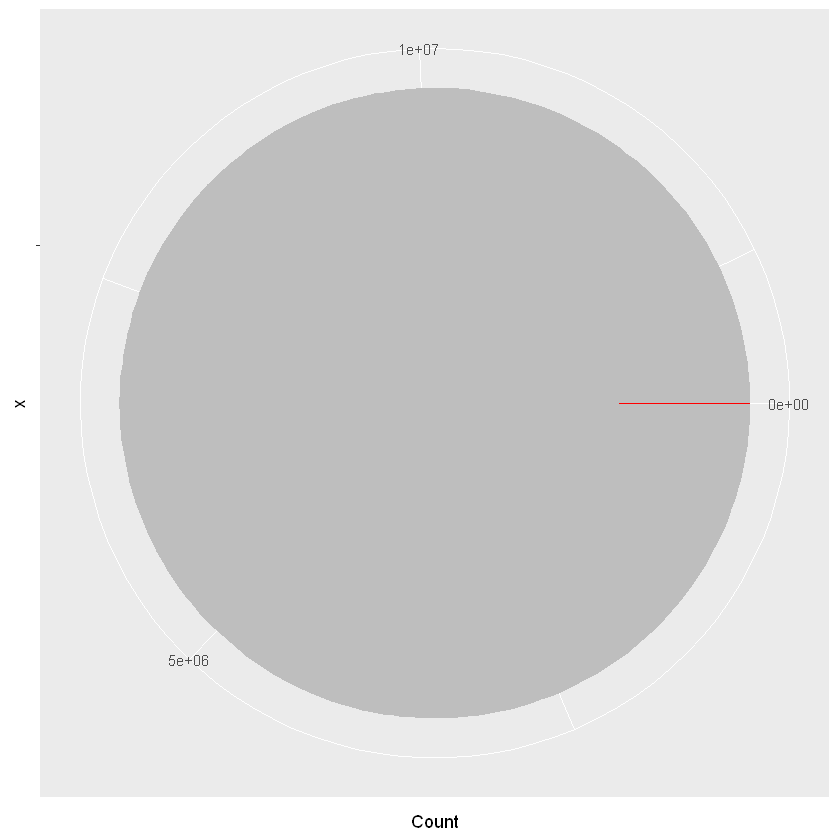

In [22]:
# Basic piechart
ggplot(df4, aes(x="", y=Count, fill=Type)) +
  geom_bar(stat="identity", width=1, fill = c('red','gray')) +
  coord_polar("y", start=1.5708) + 
theme(legend.position = "bottom") + ggsave("infograph2.png")

Saving 6.67 x 6.67 in image


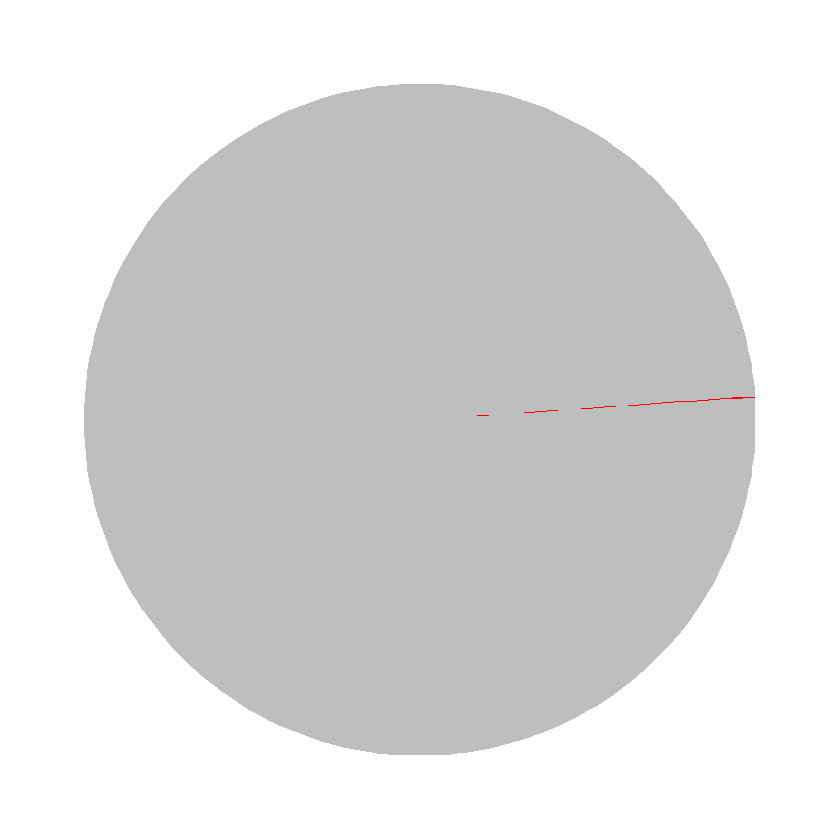

In [23]:
barPlot <- ggplot(data = df4, mapping = aes(x = 1, y = Count, fill = Type), fill = c('red','gray')) +
geom_bar(position = 'fill', stat = 'identity', width = 100, fill = c('red','gray'))

#change to coordinates to polar
piePlot <- barPlot + 
  coord_polar("y", start = 1.5) +
  theme_void()+
  theme(legend.position = 'top')
piePlot + ggsave('infograph2.png')

In [24]:
df4

,Count,Type
3,8089,Airline.Casualties
6,13450278,Vehicle.Casualties


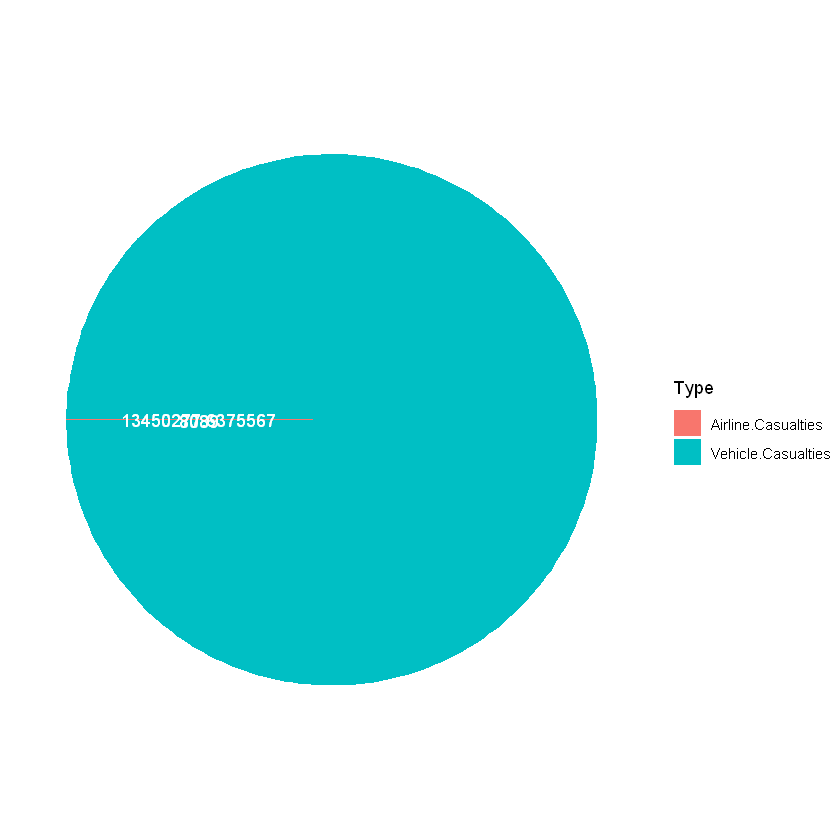

In [25]:
ggplot(df4, aes(x = 1, y = Count, fill = Type)) + 
  geom_col(position = "stack", orientation = "x") + 
  geom_text(aes(x = 1, y = Count, label = Count), col = "white") +
  scale_fill_discrete(breaks = df4$Type) +
  coord_polar("y", start=1.5708, direction = -1) +  
  theme_void()